In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import warnings

In [16]:
# read in data and check structure
data_loc = '../data/raw/wine_quality/winequality-red.csv'
df = pd.read_csv(data_loc, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

In [5]:
# scale features as UMAP works best with scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# create the UMAP object
reducer = umap.UMAP(
    n_neighbors=15, # larger = more global structure, smaller = more local detail
    min_dist=0.1, # smaller = tighter clusters
    random_state=42
)
X_umap = reducer.fit_transform(X_scaled)

/Users/kavittolia/Desktop/MSc AI and ML in Science/2025-2026/SPC707P - Machine and Deep Learning/machine-and-deep-learning/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


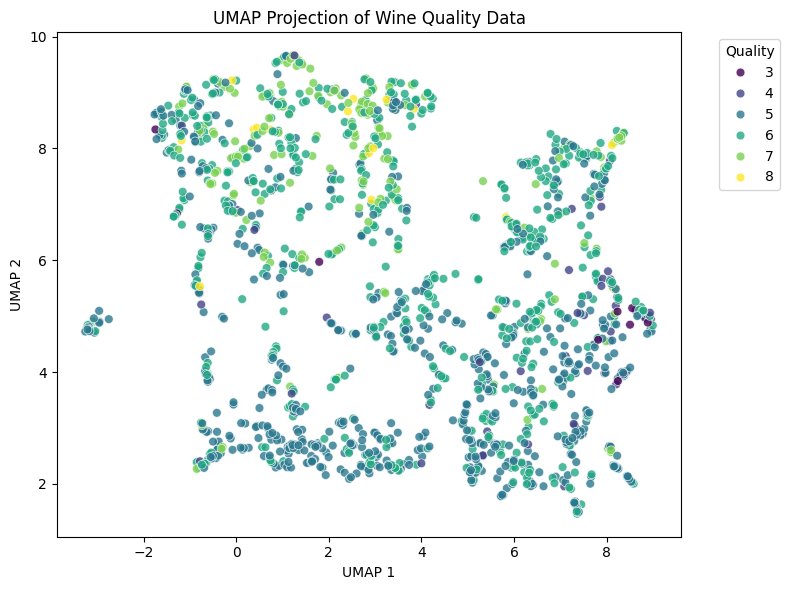

In [13]:
# visualise the UMAP
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_umap[:,0], y=X_umap[:,1],
    hue=y, palette="viridis", s=40, alpha=0.8
)
plt.title("UMAP Projection of Wine Quality Data")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Quality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Users/kavittolia/Desktop/MSc AI and ML in Science/2025-2026/SPC707P - Machine and Deep Learning/machine-and-deep-learning/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kavittolia/Desktop/MSc AI and ML in Science/2025-2026/SPC707P - Machine and Deep Learning/machine-and-deep-learning/venv/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/kavittolia/Desktop/MSc AI and ML in Science/2025-2026/SPC707P - Machine and Deep Learning/machine-and-deep-learning/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kavittolia/Desktop/MSc AI an

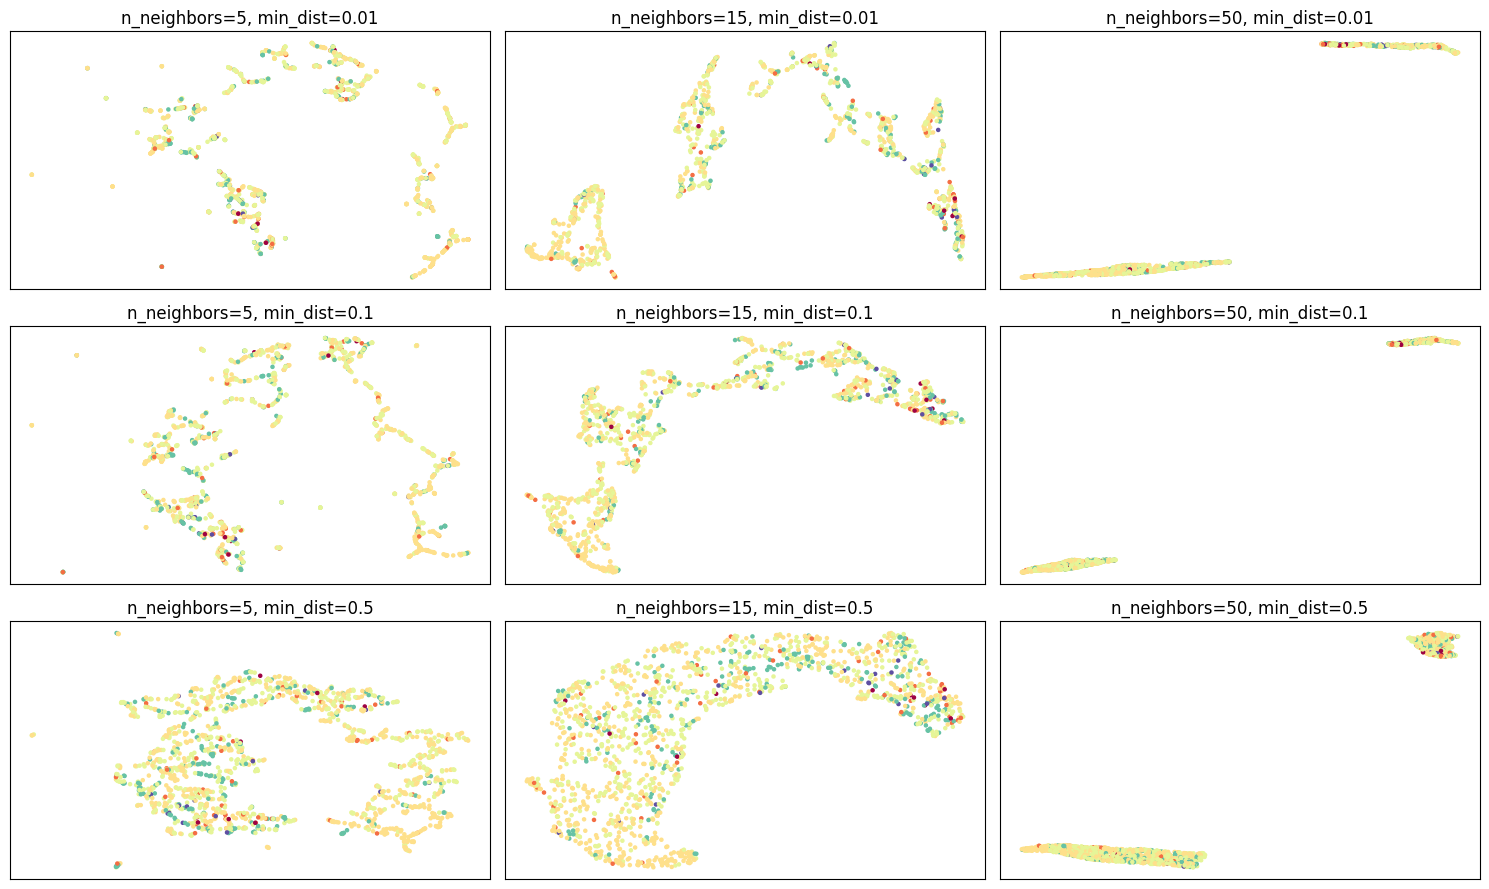

In [14]:
n_neighbors_list = [5, 15, 50]
min_dist_list = [0.01, 0.1, 0.5]

fig, axes = plt.subplots(len(min_dist_list), len(n_neighbors_list), figsize=(15, 9))

for i, min_dist in enumerate(min_dist_list):
    for j, n_neighbors in enumerate(n_neighbors_list):
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        embedding = reducer.fit_transform(X)  # your scaled wine data
        ax = axes[i, j]
        sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
        ax.set_title(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
        ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
def plot_umap_grid(
    X, y,
    n_neighbors_list=(5, 15, 50),
    min_dist_list=(0.01, 0.1, 0.5),
    title="UMAP on Wine Quality",
    figsize=(16, 9),
    savepath="umap_wine_grid_16x9.png",
    random_state=42,
    init="random",         # avoid spectral-init warnings
    point_size=8,
    point_alpha=0.85
):
    # Clean warnings (optional)
    warnings.filterwarnings("ignore", message=".*Spectral initialisation failed.*")
    warnings.filterwarnings("ignore", message=".*n_jobs value 1 overridden.*")

    # Ensure arrays
    X = np.asarray(X)
    y = np.asarray(y)

    # Standardize (recommended for UMAP)
    Xs = StandardScaler().fit_transform(X)

    # Discrete classes & palette
    classes = np.unique(y)
    cmap = get_cmap("tab10", len(classes))  # discrete, color-blind friendly
    color_map = {cls: cmap(i) for i, cls in enumerate(classes)}

    # Figure
    fig, axes = plt.subplots(len(min_dist_list), len(n_neighbors_list), figsize=figsize)
    if len(min_dist_list) == 1 and len(n_neighbors_list) == 1:
        axes = np.array([[axes]])  # normalize to 2D index

    for i, md in enumerate(min_dist_list):
        for j, nn in enumerate(n_neighbors_list):
            ax = axes[i, j]

            reducer = umap.UMAP(
                n_neighbors=nn,
                min_dist=md,
                n_components=2,
                random_state=random_state,
                init=init,          # prevents spectral warning spam
                n_jobs=1            # deterministic when random_state is set
            )
            emb = reducer.fit_transform(Xs)

            # Plot by class to get a clean legend
            for cls in classes:
                mask = (y == cls)
                ax.scatter(
                    emb[mask, 0], emb[mask, 1],
                    s=point_size, alpha=point_alpha,
                    c=[color_map[cls]], linewidths=0
                )

            ax.set_xticks([]); ax.set_yticks([])
            ax.set_xlabel("") ; ax.set_ylabel("")
            ax.set_title(f"n_neighbors={nn}, min_dist={md}", fontsize=11, pad=6)
            for spine in ax.spines.values():
                spine.set_visible(False)

    # Global title & subtitle
    fig.suptitle(title, fontsize=18, y=0.98, fontweight="bold")
    fig.text(0.5, 0.955, ha="center", fontsize=12)

    # Build a single legend for all subplots (quality scores)
    handles = [
        Line2D([0], [0], marker='o', linestyle='',
               markersize=6, markerfacecolor=color_map[cls], markeredgewidth=0,
               label=str(cls))
        for cls in classes
    ]
    # Place legend beneath the grid
    fig.legend(
        handles=handles, title="Wine quality",
        loc="lower center", bbox_to_anchor=(0.5, 0.02),
        ncol=min(len(classes), 10), frameon=False
    )

    plt.tight_layout(rect=[0, 0.06, 1, 0.93])  # leave room for legend/title
    # High-DPI, solid white background for LinkedIn
    fig.savefig(savepath, dpi=300, bbox_inches="tight", facecolor="white")
    plt.show()


/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_53062/2672953264.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10", len(classes))  # discrete, color-blind friendly


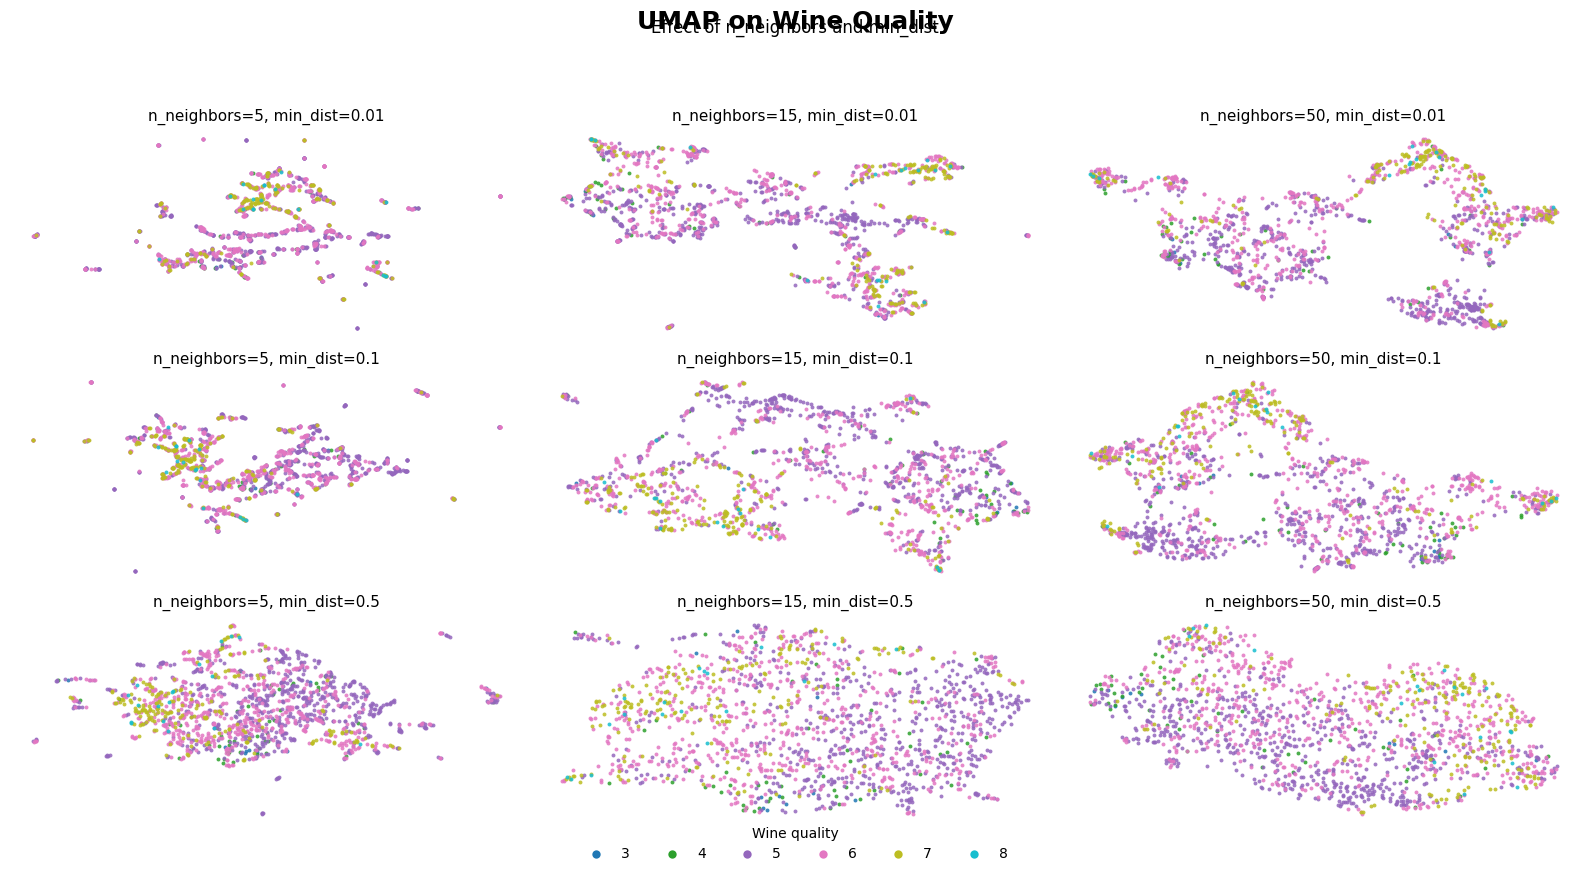

In [24]:
n_neighbors_list = [5, 15, 50]
min_dist_list    = [0.01, 0.1, 0.5]
plot_umap_grid(X, y, n_neighbors_list, min_dist_list,
               title="UMAP on Wine Quality")